In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils

/home/p3rzival/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
name = "Pruning"

In [3]:
df = pd.read_csv('summary/summarized_data.csv', index_col=['ViT Name'])
#df["Accuracy"] = df["Accuracy"]/100

In [4]:
original_acc = df.filter(regex="ViT-Defa*", axis=0)["Accuracy"].item()/100
original_time = df.filter(regex="ViT-Defa*", axis=0)["Total Latency"].item()
original_mem = df.filter(regex="ViT-Defa*", axis=0)["Max Mem use"].item()

In [5]:
prunning_data = df.filter(regex='ViT-Pru*', axis=0)
#prunning_data["Accuracy"] = 1 - prunning_data["Accuracy"]
prunning_data["Pruning"] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
prunning_data["Mem Latency"] = 0.24
#prunning_data["Max Mem use"] = 344.3725
prunning_data = prunning_data.sort_values("Pruning", ascending=True)

/tmp/ipykernel_8888/3144509173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prunning_data["Pruning"] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
/tmp/ipykernel_8888/3144509173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prunning_data["Mem Latency"] = 0.24


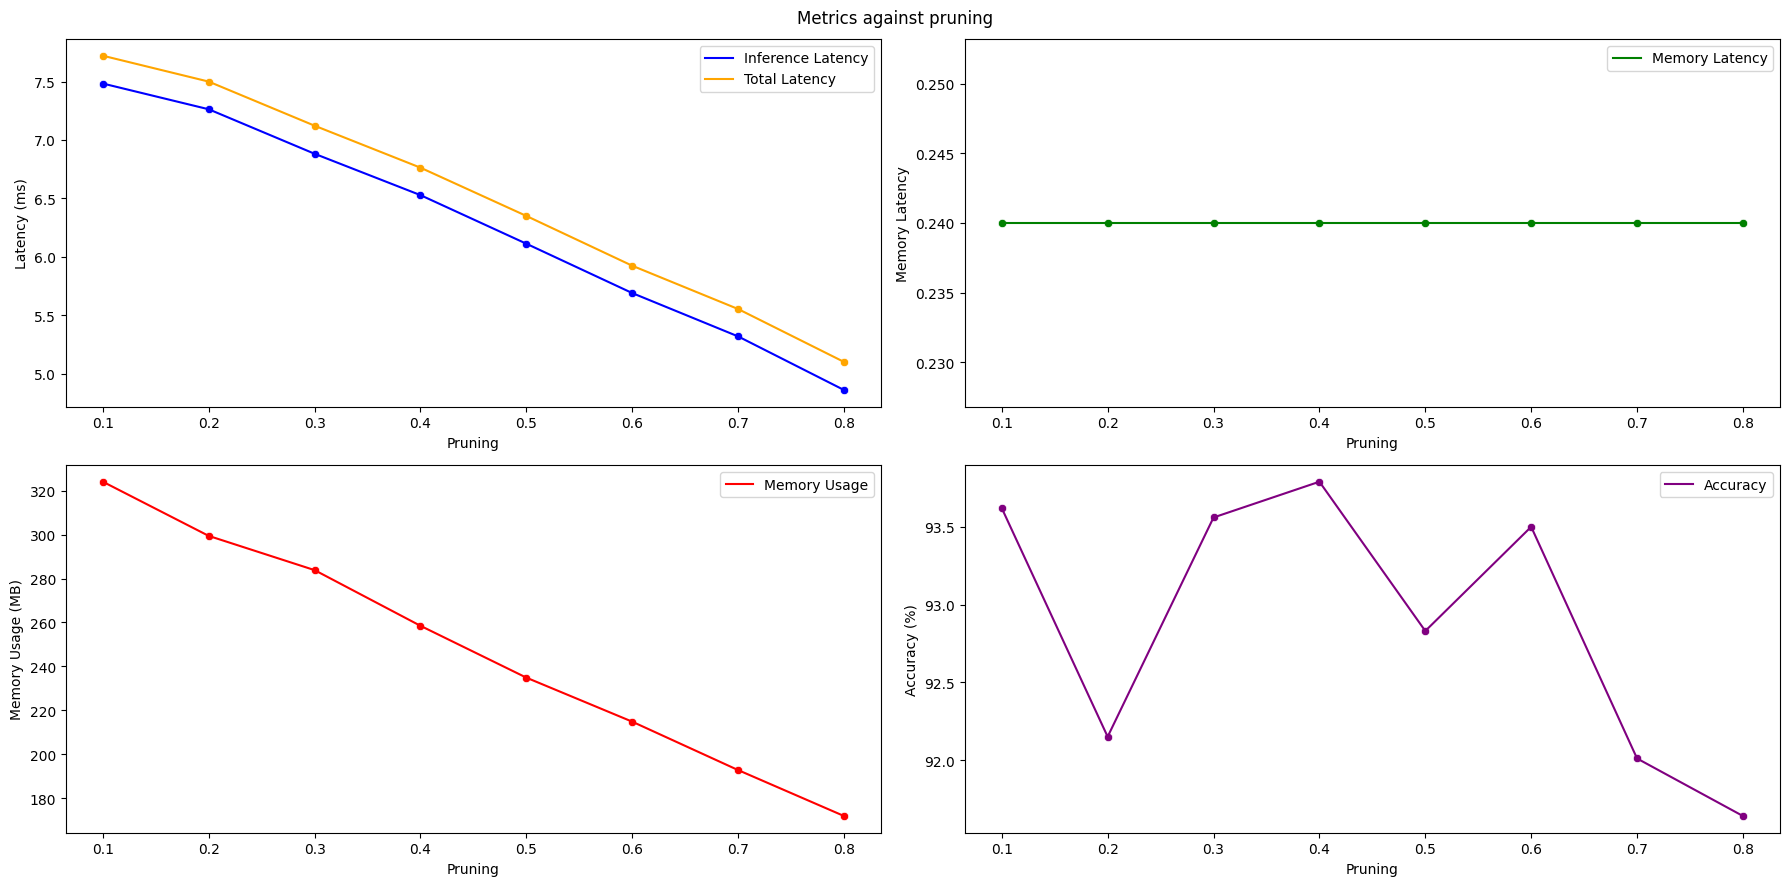

In [6]:
utils.plot_metrics_line(prunning_data, "Pruning", "Metrics against pruning")

In [7]:
prunning_data["Accuracy"] = prunning_data["Accuracy"]/100
diff_latency = original_time - prunning_data["Total Latency"]
diff_mem = original_mem - prunning_data["Max Mem use"]
diff_acc = original_acc - prunning_data["Accuracy"]

tradeoff_latency = (diff_latency/original_time)/(diff_acc/original_acc) * (prunning_data["Accuracy"]**2)
tradeoff_mem = (diff_mem/original_mem)/(diff_acc/original_acc) * (prunning_data["Accuracy"]**2)

prunning_data["Values time"] = tradeoff_latency
prunning_data["Values mem"] = tradeoff_mem

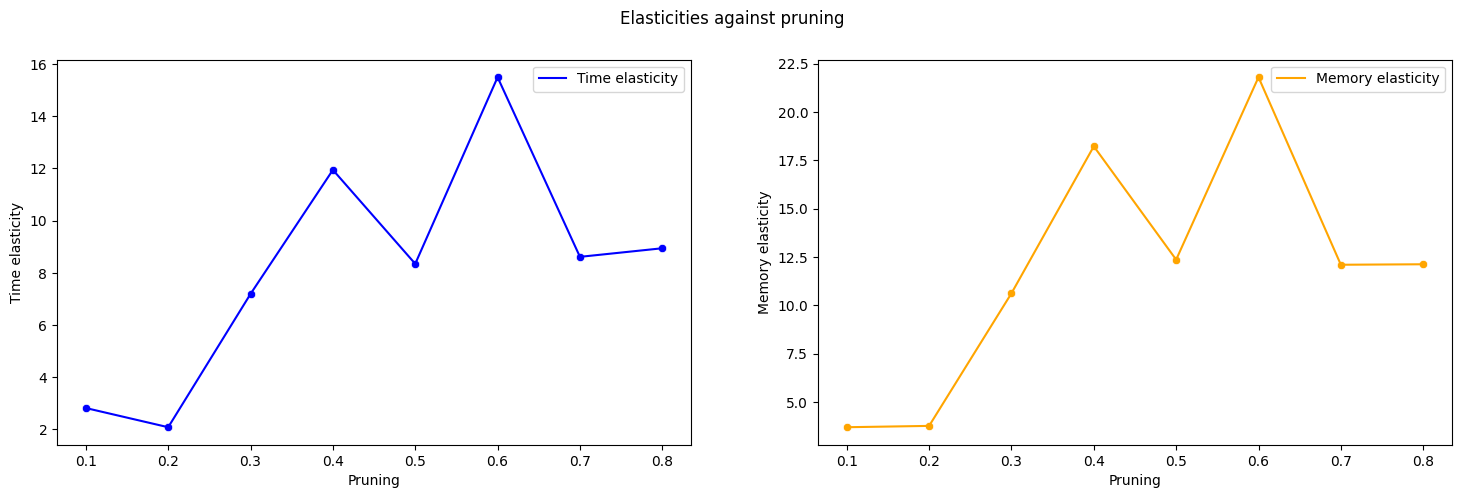

In [8]:
utils.plot_elasticities_line(prunning_data, "Pruning", "Elasticities against pruning")